In [ ]:
from train_advice_model import train_model_on_dataset
model, info, training_results = train_model_on_dataset(
        model_name="AdviceModelGeneral",
        game_name="SuperMarioBros-v3",
        dataset_path="SuperMarioBros-v3_data",
        img_processor="downsample",
        num_frames=1,
        num_epochs=20,
        num_layers=2,
        verbose=True
    )

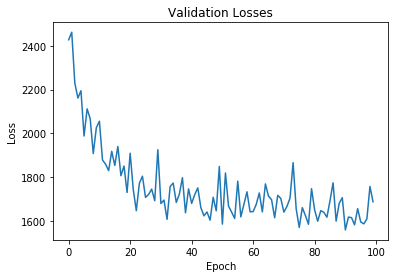

In [12]:
import matplotlib.pyplot as plt
plt.plot(training_results['val_losses'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Losses over Time")
plt.show()

In [ ]:
plt.plot(training_results['training_acc'])
plt.plot(training_results['val_acc'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Time")
plt.show()

In [13]:
for i, j in enumerate(model.modules()):
    print(i, j)
print("---")
for i, j in enumerate(model.parameters()):
    print(i, type(j), j.size())

0 AdviceModelGeneral(
  (conv0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
  (conv1): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(9, 27, kernel_size=(3, 3), stride=(1, 1))
  (linear): Linear(in_features=84564, out_features=7, bias=True)
)
1 Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
2 Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1))
3 Conv2d(9, 27, kernel_size=(3, 3), stride=(1, 1))
4 Linear(in_features=84564, out_features=7, bias=True)
---
0 <class 'torch.nn.parameter.Parameter'> torch.Size([3, 1, 3, 3])
1 <class 'torch.nn.parameter.Parameter'> torch.Size([3])
2 <class 'torch.nn.parameter.Parameter'> torch.Size([9, 3, 3, 3])
3 <class 'torch.nn.parameter.Parameter'> torch.Size([9])
4 <class 'torch.nn.parameter.Parameter'> torch.Size([27, 9, 3, 3])
5 <class 'torch.nn.parameter.Parameter'> torch.Size([27])
6 <class 'torch.nn.parameter.Parameter'> torch.Size([7, 84564])
7 <class 'torch.nn.parameter.Parameter'> torch.Size([7])


In [14]:
from test_advice_model import test_model_on_game
test_results = test_model_on_game(model=model,
                   training_info=info,
                   num_epochs=100,
                   visualize=False,
                                  verbose=True)

(array([29.,  0.,  0., 63.,  0.,  0.,  4.,  1.,  0.,  3.]),
 array([299. , 341.4, 383.8, 426.2, 468.6, 511. , 553.4, 595.8, 638.2,
        680.6, 723. ]),
 <a list of 10 Patch objects>)

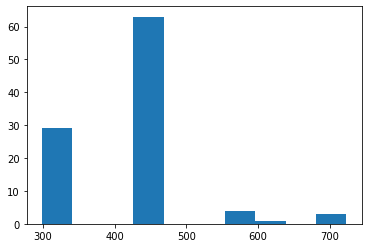

In [15]:
plt.hist(test_results['x_pos'])